In [1]:
import os
import gc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
DATA_PATH = os.path.join(os.environ['DEV_PATH'], 'dataset/american_express_default_prediction')

In [3]:
train = pd.read_parquet(os.path.join(DATA_PATH, 'train.parquet'))
train_labels = pd.read_csv(os.path.join(DATA_PATH, 'train_labels.csv'))

train.shape, train_labels.shape

((5531451, 190), (458913, 2))

In [4]:
train = train.merge(train_labels, left_on='customer_ID', right_on='customer_ID')
print(train.shape)
del train_labels
gc.collect()

(5531451, 191)


0

### 변수 개수

D_    96
S_    22
P_     3
B_    40
R_    28
dtype: int64


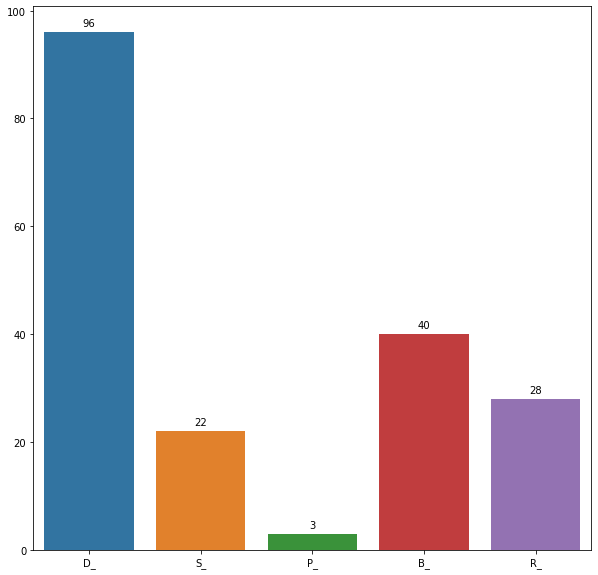

In [5]:
features = ['D_', 'S_', 'P_', 'B_', 'R_']
features = dict(zip(features, np.zeros(len(features)).astype('int')))

for col in train.columns:
    for key in features.keys():
        if col.startswith(key):
            features[key] += 1
            break

num_features = pd.Series(features)
print(num_features)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
splot = sns.barplot(x=num_features.index, y=num_features.values)
for g in splot.patches:
    splot.annotate(
        int(g.get_height()),
        (g.get_x() + g.get_width() / 2., g.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )
plt.show()

### Target 분포

In [6]:
data = train['target'].value_counts()
data

0    4153582
1    1377869
Name: target, dtype: int64

In [7]:
num_targets = len(train['target'])
data / num_targets

0    0.750903
1    0.249097
Name: target, dtype: float64

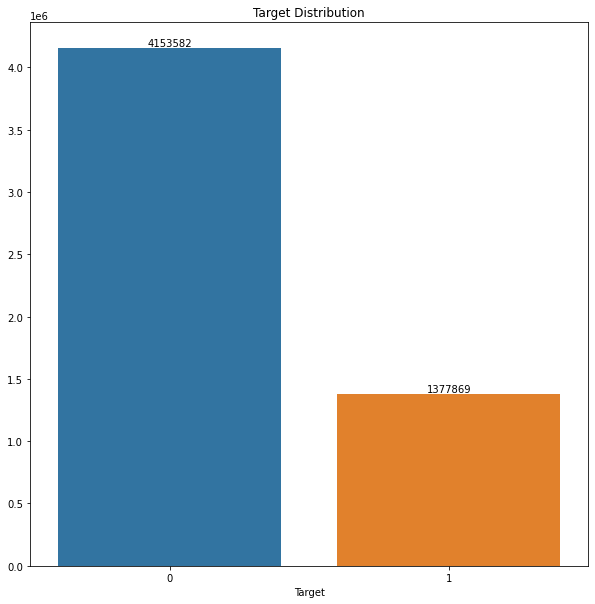

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=data.index, y=data.values)
ax.set_title('Target Distribution')
ax.set_xlabel('Target')
ax.bar_label(ax.containers[0], fmt='%d')
plt.show()

### D 변수

In [9]:
D_columns = [col for col in train.columns if col.startswith('D_')]
D_columns

['D_39',
 'D_41',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'D_50',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_60',
 'D_61',
 'D_62',
 'D_63',
 'D_64',
 'D_65',
 'D_66',
 'D_68',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_73',
 'D_74',
 'D_75',
 'D_76',
 'D_77',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'D_86',
 'D_87',
 'D_88',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

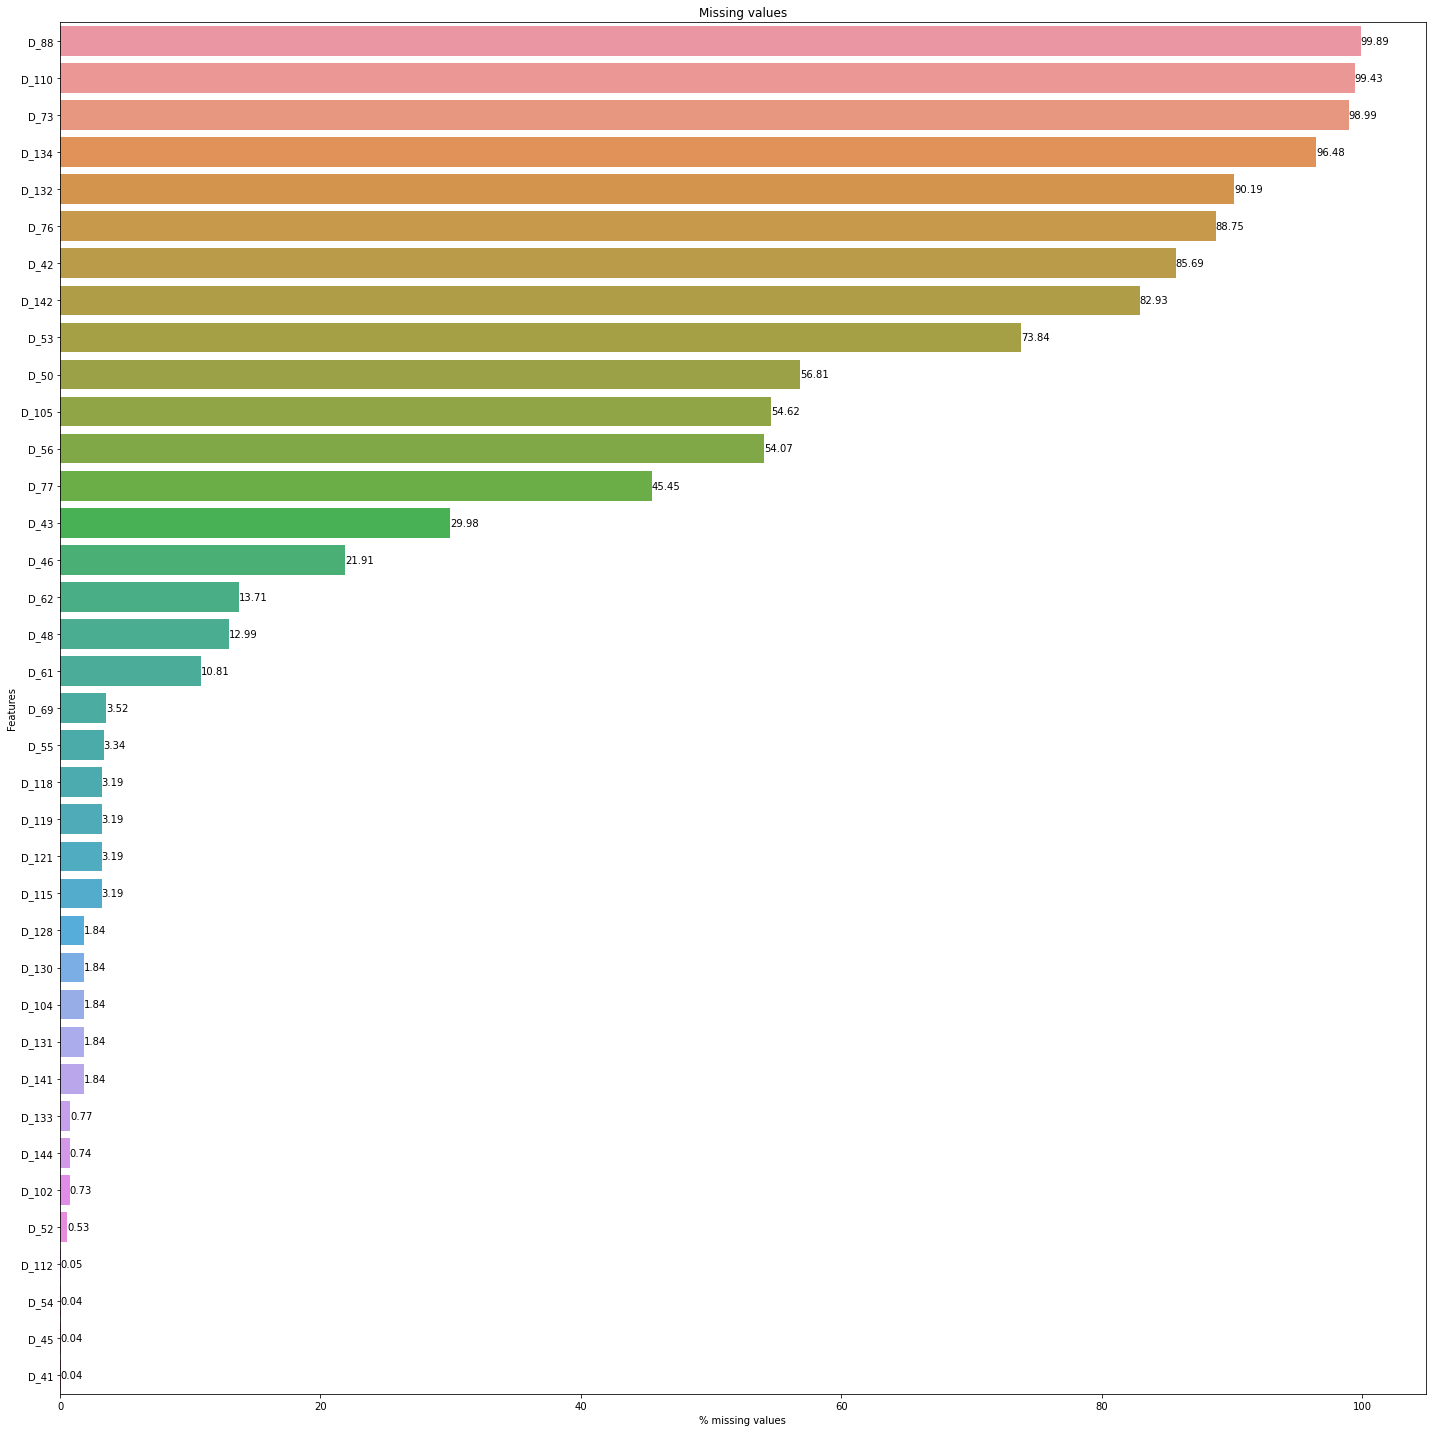

In [10]:
ncounts = (pd.DataFrame([train[D_columns].isnull().sum() * 100 / len(train)]).T).round(2)
ncounts = ncounts.rename(columns={0: 'train_missing'})
ncounts = ncounts.sort_values('train_missing', ascending=False)
ncounts_over_0 = ncounts.loc[ncounts['train_missing'] > 0]
ncounts_over_0

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(x=ncounts_over_0['train_missing'], y=ncounts_over_0.index, ax=ax)
ax.set_title('Missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Features')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

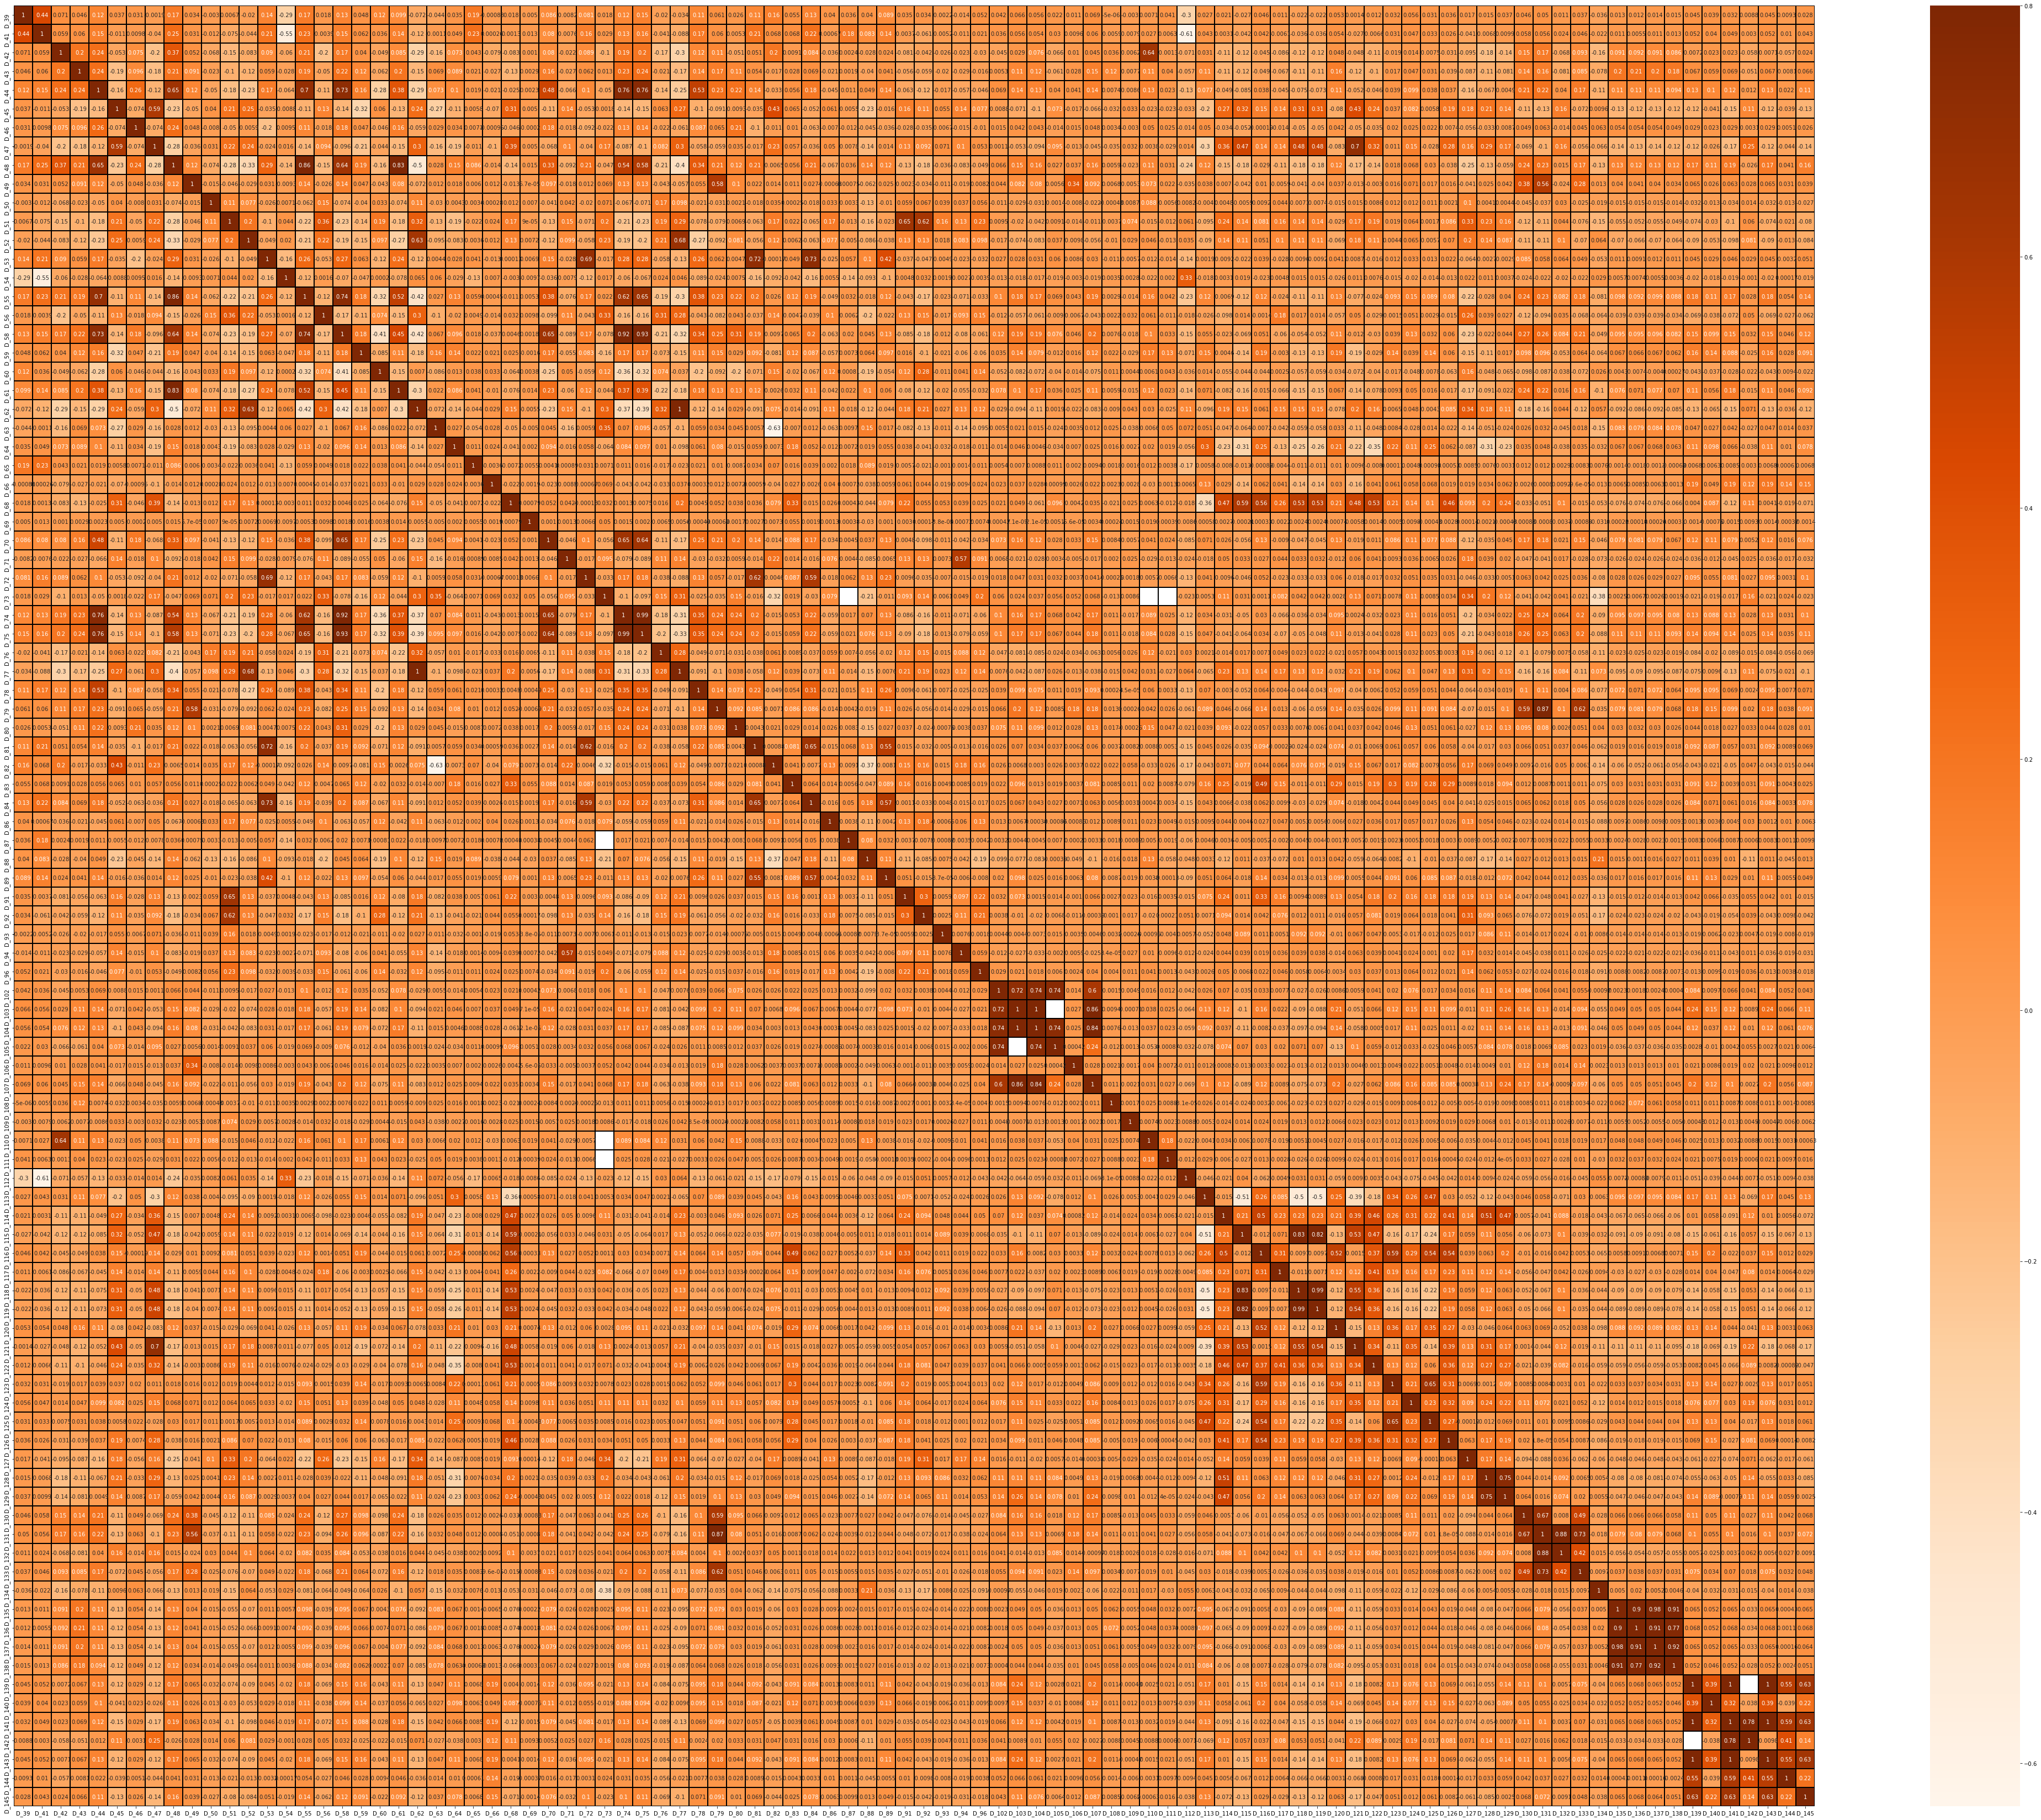

In [11]:
corr = train[D_columns].corr(method='pearson')
fig, ax = plt.subplots(1, 1, figsize=(75, 60))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap='Oranges', linecolor='black')
plt.show()

### S 변수

In [12]:
S_columns = [col for col in train.columns if col.startswith('S_')]
S_columns

['S_2',
 'S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

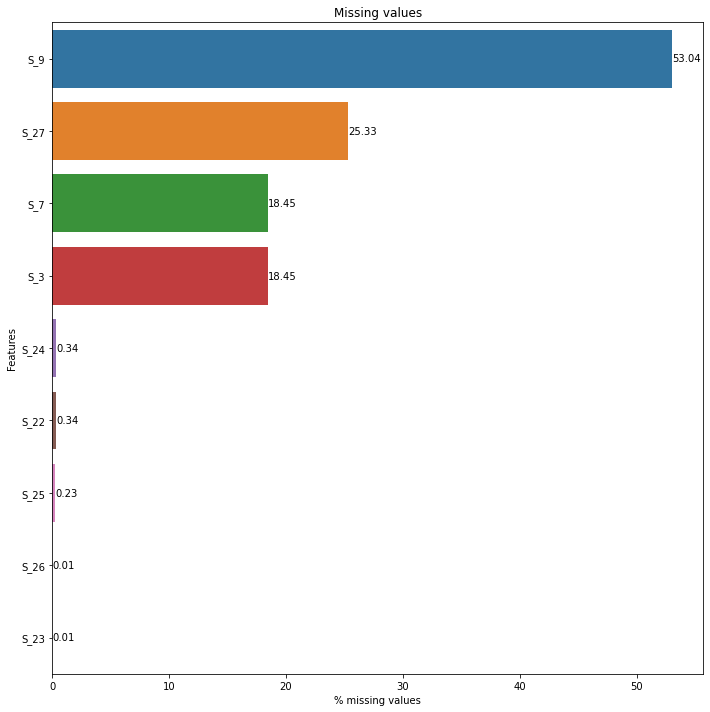

In [13]:
ncounts = (pd.DataFrame([train[S_columns].isnull().sum() * 100 / len(train)]).T).round(2)
ncounts = ncounts.rename(columns={0: 'train_missing'})
ncounts = ncounts.sort_values('train_missing', ascending=False)
ncounts_over_0 = ncounts.loc[ncounts['train_missing'] > 0]
ncounts_over_0

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=ncounts_over_0['train_missing'], y=ncounts_over_0.index, ax=ax)
ax.set_title('Missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Features')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [17]:
corr = train[S_columns].corr(method='pearson')

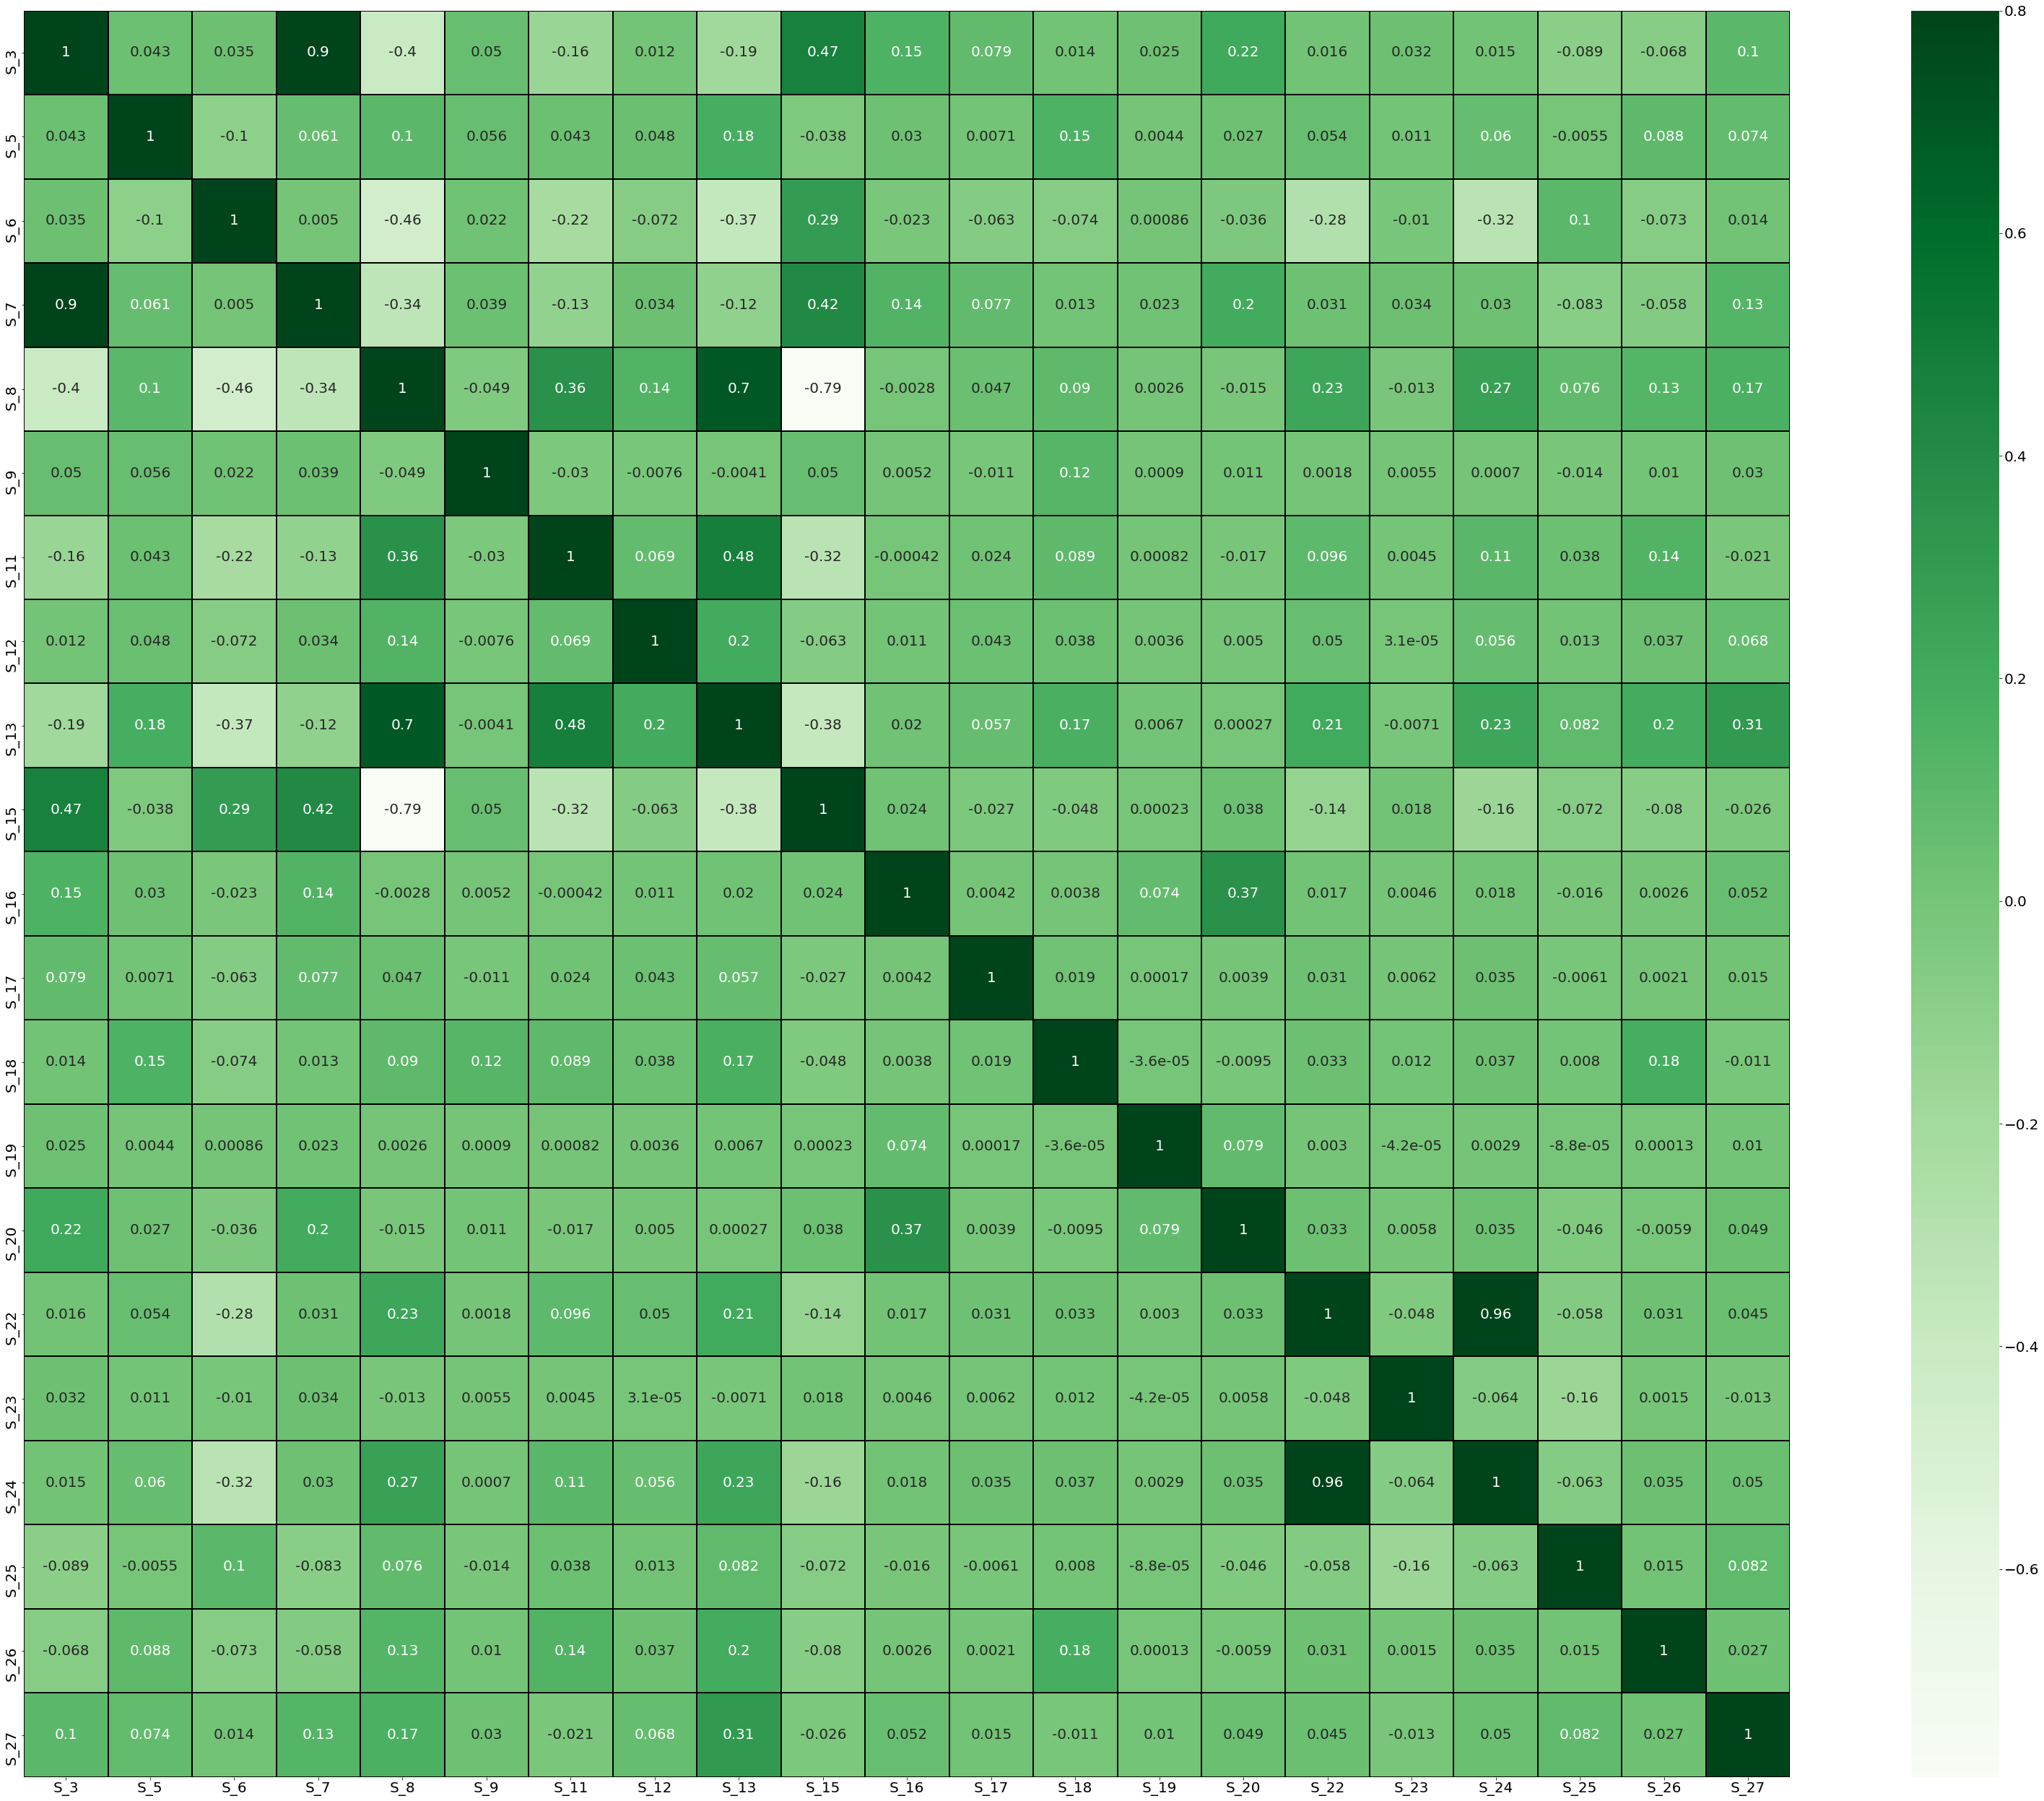

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(60, 45))
sns.heatmap(
    corr, vmax=.8, linewidth=.01, square=True, annot=True,
    cmap='Greens', linecolor='black',
    annot_kws={
        'fontsize': 20
    }
)
ax.collections[0].colorbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### P 변수

In [23]:
P_columns = [col for col in train.columns if col.startswith('P_')]
P_columns

['P_2', 'P_3', 'P_4']

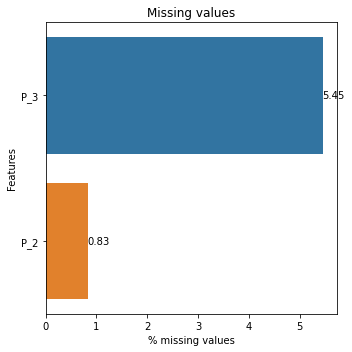

In [25]:
ncounts = (pd.DataFrame([train[P_columns].isnull().sum() * 100 / len(train)]).T).round(2)
ncounts = ncounts.rename(columns={0: 'train_missing'})
ncounts = ncounts.sort_values('train_missing', ascending=False)
ncounts_over_0 = ncounts.loc[ncounts['train_missing'] > 0]
ncounts_over_0

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(x=ncounts_over_0['train_missing'], y=ncounts_over_0.index, ax=ax)
ax.set_title('Missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Features')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [26]:
corr = train[P_columns].corr()

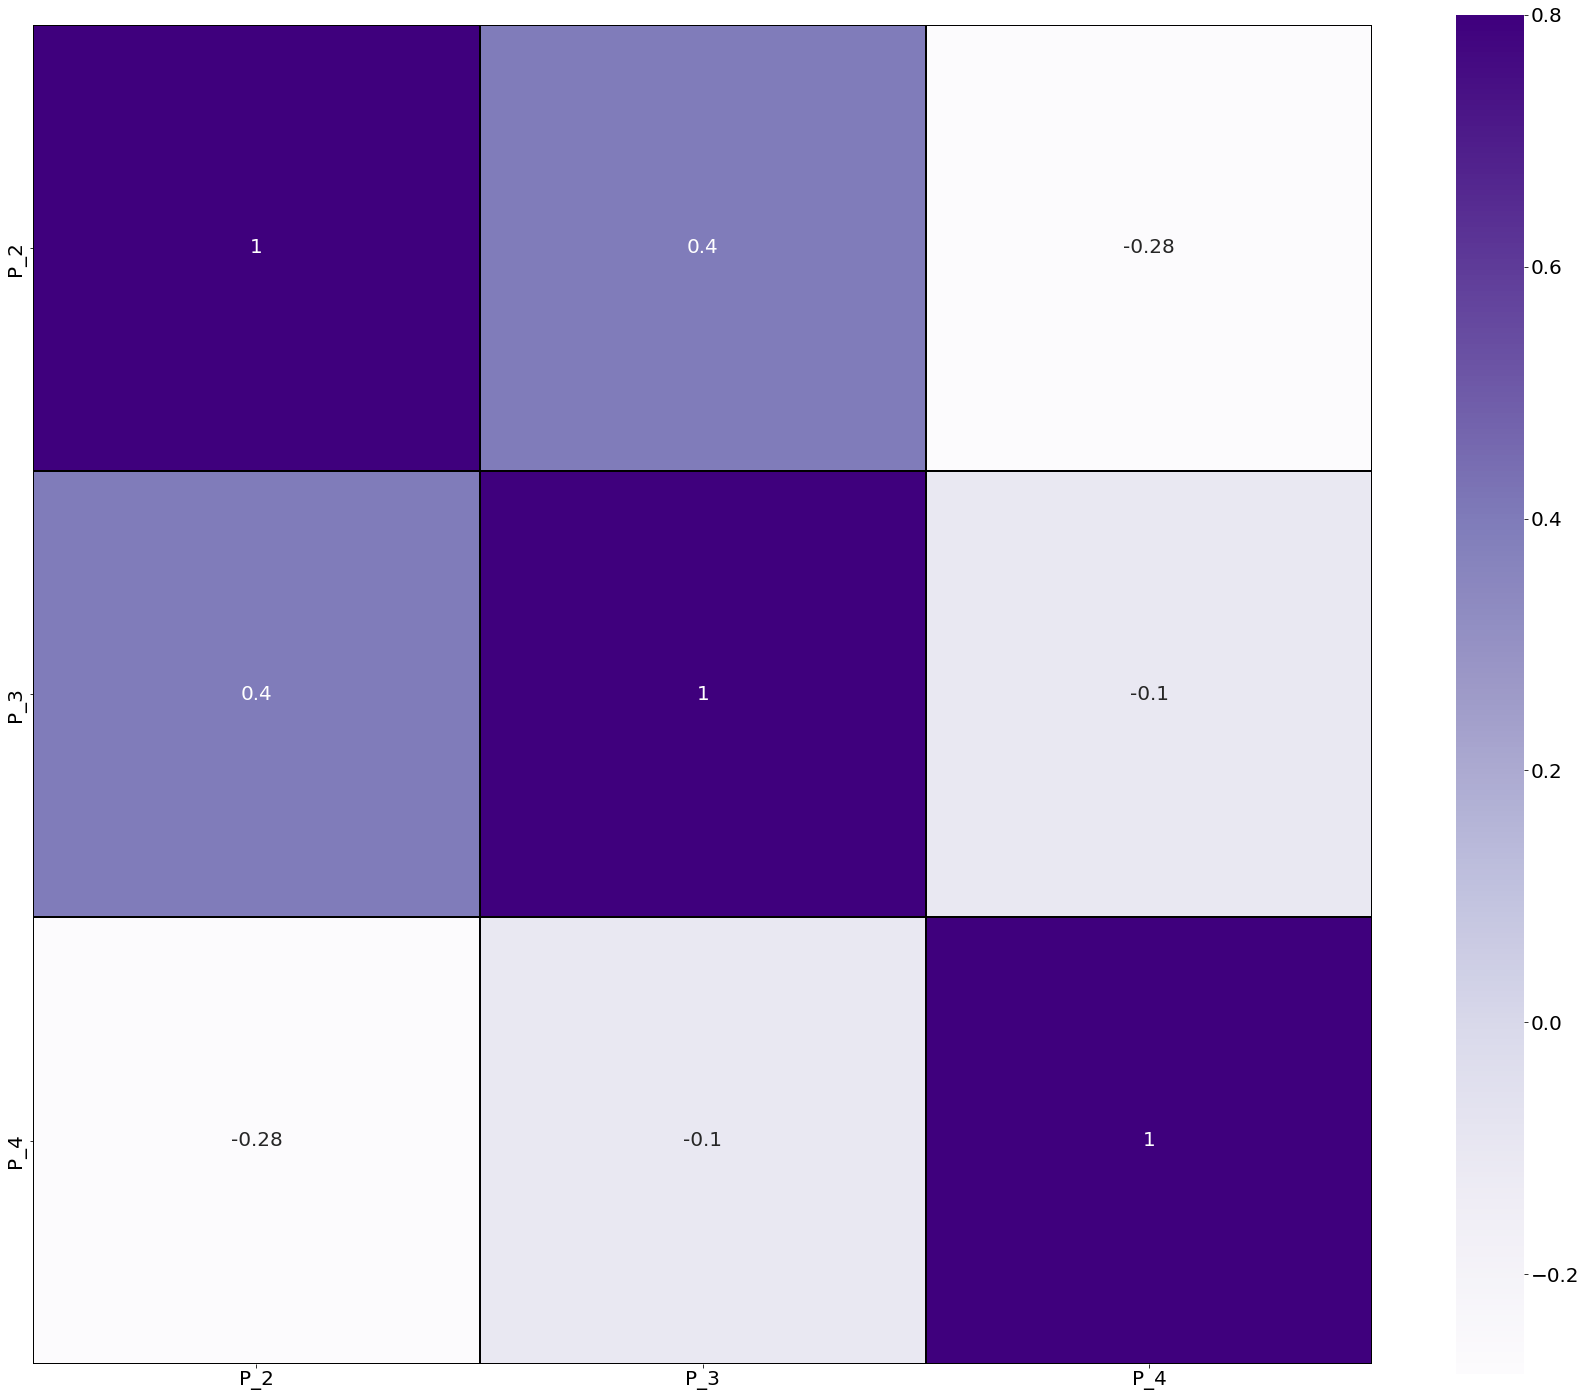

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(30, 25))
sns.heatmap(
    corr, vmax=.8, linewidth=.01, square=True, annot=True,
    cmap='Purples', linecolor='black',
    annot_kws={
        'fontsize': 20
    }
)
ax.collections[0].colorbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### B 변수

In [33]:
B_columns = [col for col in train.columns if col.startswith('B_')]
B_columns

['B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_29',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_38',
 'B_39',
 'B_40',
 'B_41',
 'B_42']

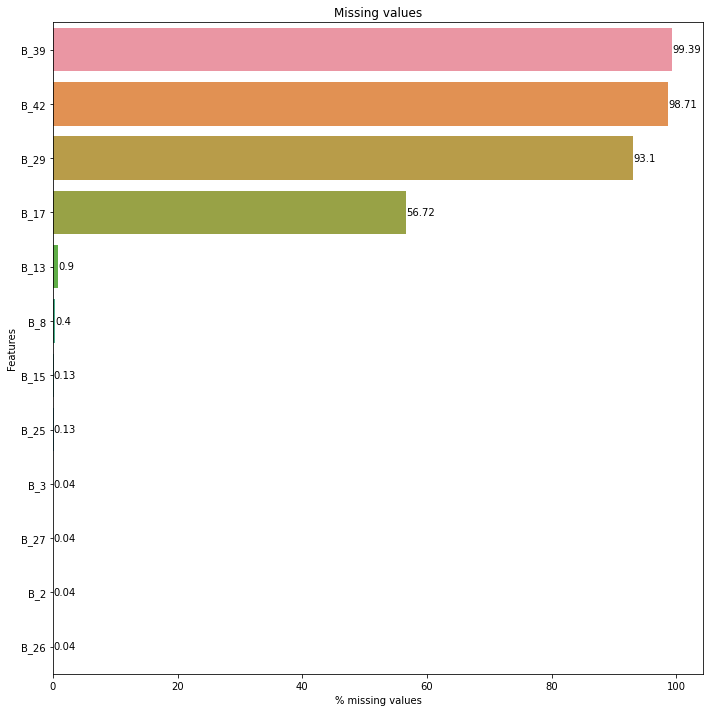

In [35]:
ncounts = (pd.DataFrame([train[B_columns].isnull().sum() * 100 / len(train)]).T).round(2)
ncounts = ncounts.rename(columns={0: 'train_missing'})
ncounts = ncounts.sort_values('train_missing', ascending=False)
ncounts_over_0 = ncounts.loc[ncounts['train_missing'] > 0]
ncounts_over_0

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=ncounts_over_0['train_missing'], y=ncounts_over_0.index, ax=ax)
ax.set_title('Missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Features')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### R 변수

In [42]:
R_columns = [col for col in train.columns if col.startswith('R_')]
R_columns

['R_1',
 'R_2',
 'R_3',
 'R_4',
 'R_5',
 'R_6',
 'R_7',
 'R_8',
 'R_9',
 'R_10',
 'R_11',
 'R_12',
 'R_13',
 'R_14',
 'R_15',
 'R_16',
 'R_17',
 'R_18',
 'R_19',
 'R_20',
 'R_21',
 'R_22',
 'R_23',
 'R_24',
 'R_25',
 'R_26',
 'R_27',
 'R_28']

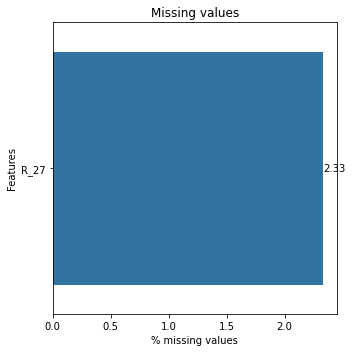

In [46]:
ncounts = (pd.DataFrame([train[R_columns].isnull().sum() * 100 / len(train)]).T).round(2)
ncounts = ncounts.rename(columns={0: 'train_missing'})
ncounts = ncounts.sort_values('train_missing', ascending=False)
ncounts_over_0 = ncounts.loc[ncounts['train_missing'] > 0]
ncounts_over_0

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(x=ncounts_over_0['train_missing'], y=ncounts_over_0.index, ax=ax)
# sns.barplot(x=ncounts['train_missing'], y=ncounts.index, ax=ax)
ax.set_title('Missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Features')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()